# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

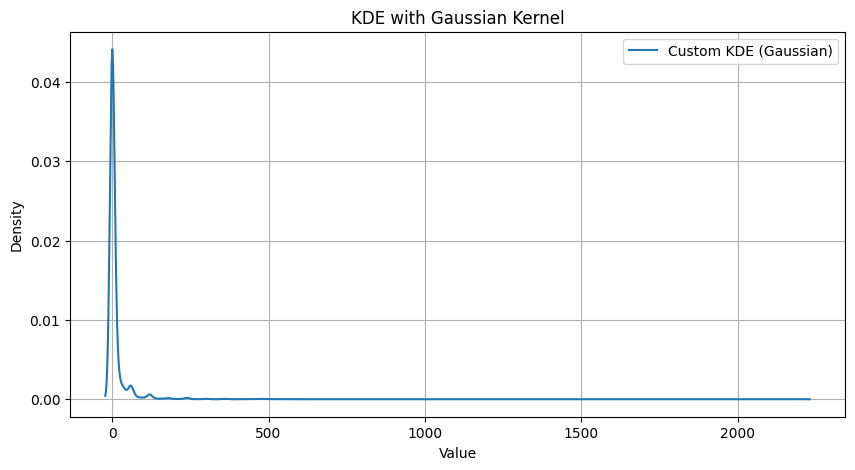

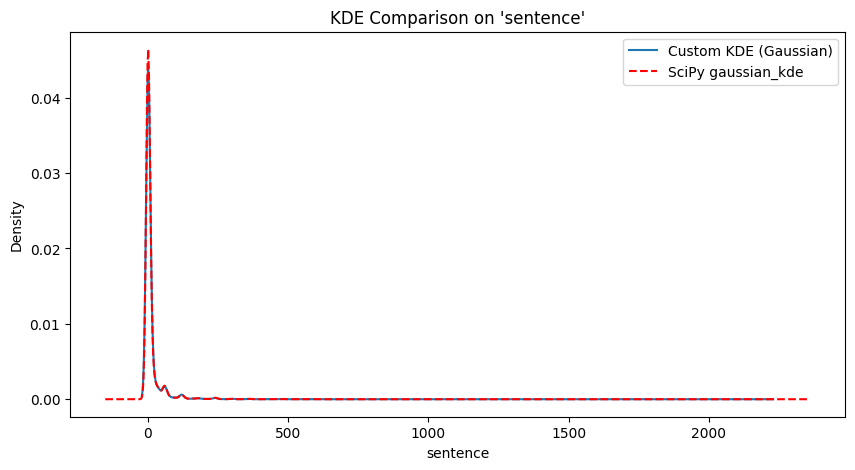

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

def kde_custom(
    values,
    bw=None,
    kernel_type='gaussian',
    points=1000,
    do_plot=True,
    plot_label='Custom KDE'
):
    if isinstance(values, pd.Series):
        values = values.values
    elif not isinstance(values, np.ndarray):
        raise TypeError("Input must be Pandas Series or NumPy array.")

    values = values[~np.isnan(values)]

    if len(values) == 0:
        raise ValueError("Input data is empty after removing NaNs.")

    n = len(values)

    if bw is None:
        std_dev = np.std(values)
        bw = 1.06 * std_dev * n ** (-1 / 5)

    def gaussian_kernel(z):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

    def uniform_kernel(z):
        return 0.5 * (np.abs(z) <= 1)

    def epanechnikov_kernel(z):
        return 0.75 * (1 - z**2) * (np.abs(z) <= 1)

    kernels = {
        'gaussian': gaussian_kernel,
        'uniform': uniform_kernel,
        'epanechnikov': epanechnikov_kernel
    }

    if kernel_type not in kernels:
        raise ValueError("kernel_type must be one of 'gaussian', 'uniform', or 'epanechnikov'")

    kernel = kernels[kernel_type]

    x_grid = np.linspace(values.min() - 3*bw, values.max() + 3*bw, points)
    z = (x_grid[:, None] - values[None, :]) / bw
    kernel_values = kernel(z)
    kde_vals = np.mean(kernel_values, axis=1) / bw

    if do_plot:
        plt.figure(figsize=(10, 5))
        plt.plot(x_grid, kde_vals, label=plot_label)
        plt.xlabel("Value")
        plt.ylabel("Density")
        plt.title(f"KDE with {kernel_type.capitalize()} Kernel")
        plt.grid(True)
        plt.legend()

    return x_grid, kde_vals


# Load CSV
data_df = pd.read_csv('pretrial_data.csv')
print(data_df.head())

column_to_use = 'sentence'  # replace with your numeric column
col_values = data_df[column_to_use].dropna()

# Custom KDE
x_vals, kde_estimates = kde_custom(col_values, kernel_type='gaussian', bw=None, plot_label='Custom KDE (Gaussian)')

# SciPy KDE for comparison
scipy_kde = gaussian_kde(col_values)
scipy_x = np.linspace(col_values.min() - 3*np.std(col_values), col_values.max() + 3*np.std(col_values), 1000)
scipy_y = scipy_kde(scipy_x)

# Plot comparison
plt.figure(figsize=(10,5))
plt.plot(x_vals, kde_estimates, label='Custom KDE (Gaussian)')
plt.plot(scipy_x, scipy_y, label='SciPy gaussian_kde', linestyle='--', color='red')
plt.title(f"KDE Comparison on '{column_to_use}'")
plt.xlabel(column_to_use)
plt.ylabel('Density')
plt.legend()
plt.show()





**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<bound method NDFrame.head of       index  unitid                                chronname             city  \
0         0  100654                   Alabama A&M University           Normal   
1         1  100663      University of Alabama at Birmingham       Birmingham   
2         2  100690                       Amridge University       Montgomery   
3         3  100706      University of Alabama at Huntsville       Huntsville   
4         4  100724                 Alabama State University       Montgomery   
...     ...     ...                                      ...              ...   
3793   3793  461528                Grace College of Divinity     Fayetteville   
3794   3794  462354  John Paul the Great Catholic University        Escondido   
3795   3795  466921  Chamberlain College of Nursing-Missouri        St. Louis   
3796   3796  474881              Minneapolis Media Institute            Edina   
3797   3797  475291            Brown College-Brooklyn Center  Brooklyn Center  

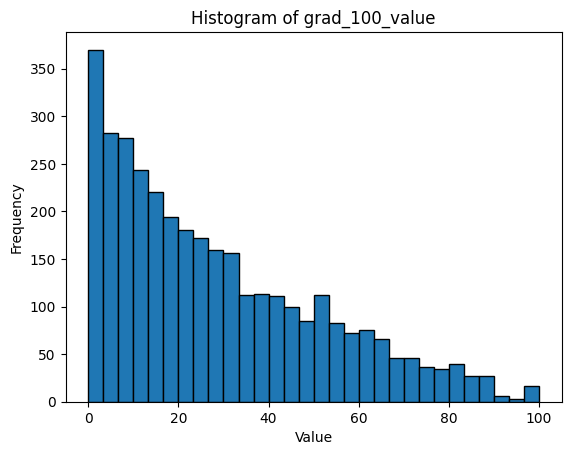

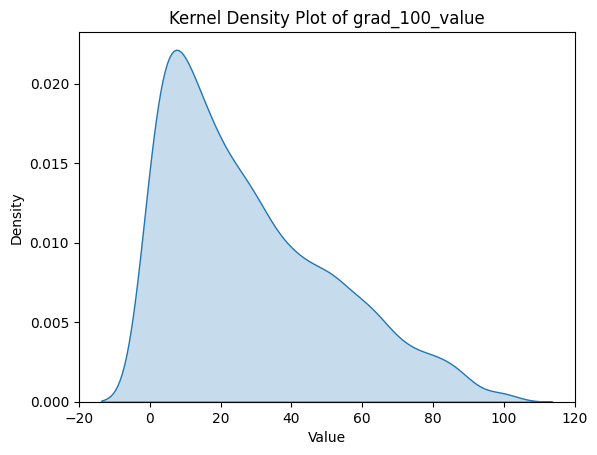

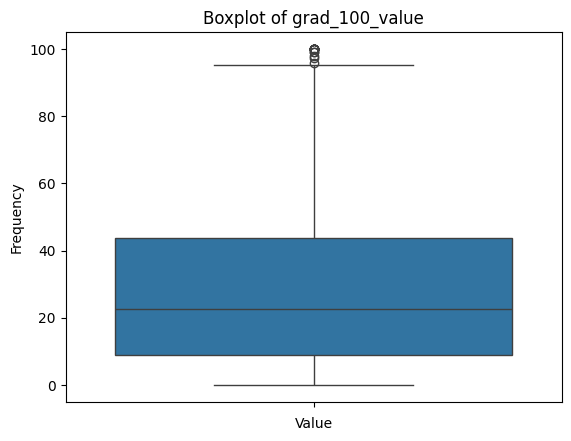

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


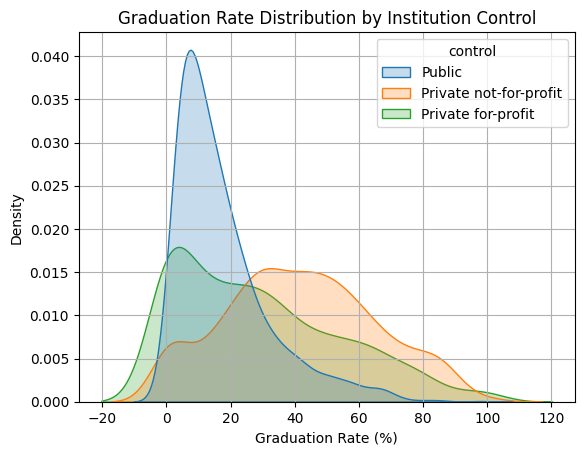

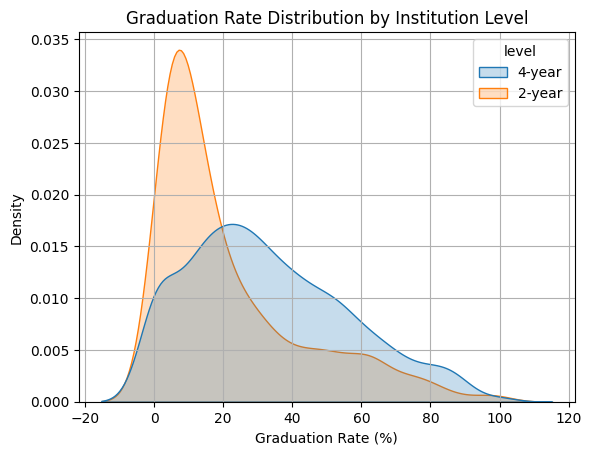

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

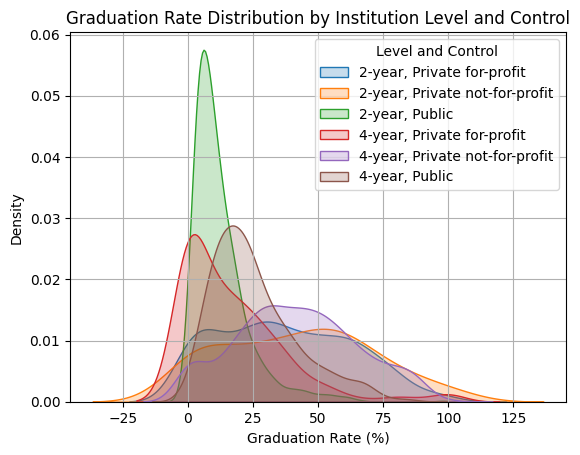

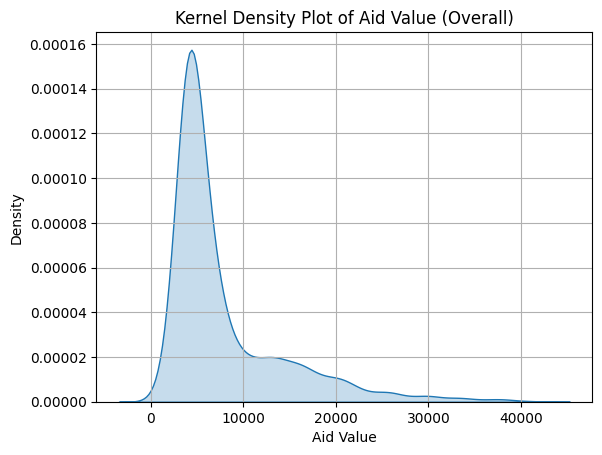

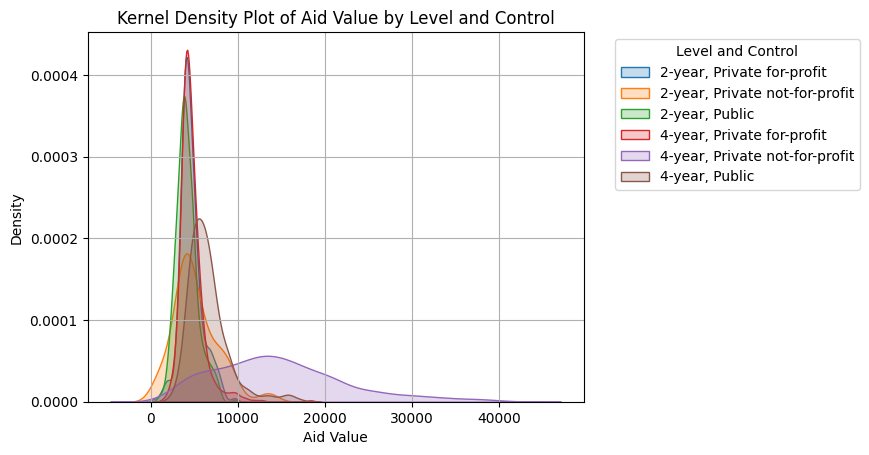

                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.

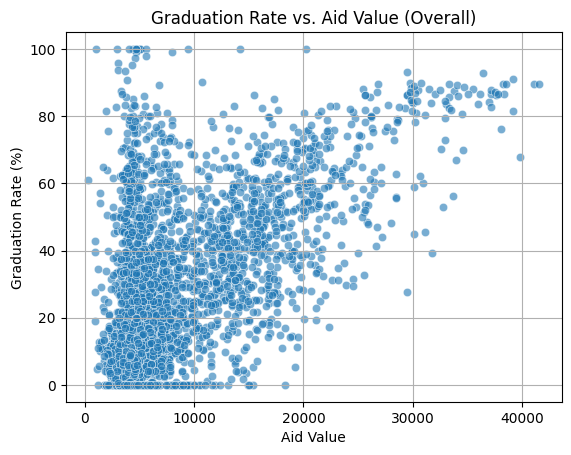

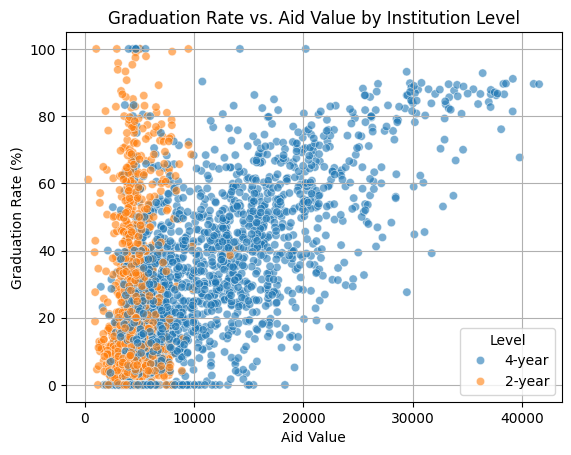

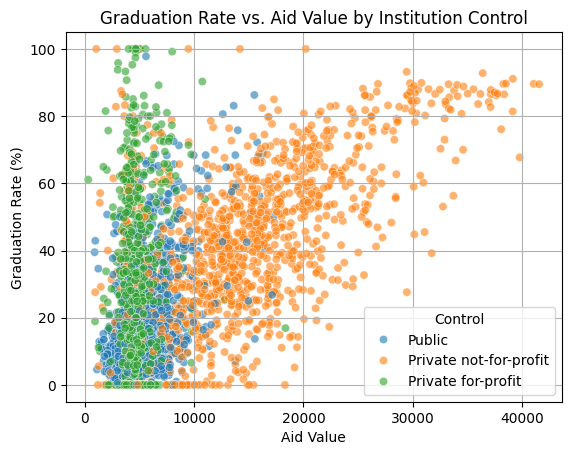

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1
college_df = pd.read_csv('college_completion.csv')

#2
print(college_df.head)
#dimensions: (3798, 63)
#observations: 3798
print(college_df.columns)
#variables: 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
#     'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
#      'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
#      'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
#      'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
#       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
#       'endow_value', 'endow_percentile', 'grad_100_value',
#      'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
#       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
#       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
#       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
#       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
#       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
#       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
#      'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
#       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
#       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
#       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
#       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
#       'cohort_size'

#3
pd.crosstab(college_df['control'], college_df['level'])
#There are more 4 year private for profits and private not for profits than 2 year ones.
#There are mroe public 2 year institutions than 4 years.

#4
nonna_values = college_df['grad_100_value'].dropna()
plt.hist(nonna_values, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of grad_100_value')
plt.show()

sns.kdeplot(nonna_values, fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of grad_100_value')
plt.show()

sns.boxplot(nonna_values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Boxplot of grad_100_value')
plt.show()

print(nonna_values.describe())

#5
sns.kdeplot(data=college_df, x='grad_100_value', hue='control', common_norm=False, fill=True)
plt.title("Graduation Rate Distribution by Institution Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

sns.kdeplot(data=college_df, x='grad_100_value', hue='level', common_norm=False, fill=True)
plt.title("Graduation Rate Distribution by Institution Level")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

grouped_stats = college_df.groupby(['level', 'control'])['grad_100_value'].describe()
print(grouped_stats)
# Summary of graduation rates by level and control:
# Private not-for-profit schools have the highest rates (abotu 42% mean) at both 2- and 4-year levels.
# Private for-profit show moderate rates at 2-year (about 37%) but much lower at 4-year (about 17%).
# Public 2-year institutions have the lowest rates (about 12% mean).
# Overall, private not-for-profit institutions perform best in graduation rates.

#6
college_df['levelXcontrol'] = college_df['level'] + ', ' + college_df['control']

# Plot each group individually to ensure legend labels
for group, subset in college_df.groupby('levelXcontrol'):
    sns.kdeplot(subset['grad_100_value'], label=group, fill=True, common_norm=False)

plt.title("Graduation Rate Distribution by Institution Level and Control")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Density")
plt.grid(True)
plt.legend(title='Level and Control')
plt.show()
#2 year public instituitions have the highest graduation rate

#7
sns.kdeplot(data=college_df, x='aid_value', fill=True)
plt.title("Kernel Density Plot of Aid Value (Overall)")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

for group, subset in college_df.groupby('levelXcontrol'):
    sns.kdeplot(subset['aid_value'], label=group, fill=True, common_norm=False)
plt.title("Kernel Density Plot of Aid Value by Level and Control")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend(title='Level and Control', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

grouped_aid_stats = college_df.groupby(['level', 'control'])['aid_value'].describe()
print(grouped_aid_stats)
#If an institution has a higher population, it has gotten more aid.

#8
sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value (Overall)')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.grid(True)
plt.show()

sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value by Institution Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Level')
plt.grid(True)
plt.show()

sns.scatterplot(data=college_df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value by Institution Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Control')
plt.grid(True)
plt.show()

#generally, institutions with higher aid values tend to have higher graduation rates
